In [22]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import API key
#from api_keys import geoapify_key


In [23]:
# Specify the path to your CSV file
csvpath = 'Resources/reduced.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csvpath)
data_df = pd.DataFrame(data)
# Display the DataFrame
data_df.head()


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,357091,Texas,Female,Very good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,58.97,21.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
1,199859,Minnesota,Female,Good,6.0,25.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.55,56.70,23.62,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",Yes,No
2,347964,Texas,Female,Good,10.0,20.0,Within past year (anytime less than 12 months ...,Yes,12.0,"6 or more, but not all",...,1.60,61.23,23.91,Yes,No,No,Yes,"Yes, received Tdap",No,No
3,407343,Washington,Female,Fair,0.0,19.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,...,1.57,NaN,NaN,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
4,211281,Mississippi,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.85,95.25,27.71,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes


In [24]:
print(data_df.columns)

Index(['Unnamed: 0', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [25]:
#Remove unneeded columns
cleaned_data_df=data_df[['State', 'Sex','GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',	'PhysicalActivities', 
                         'BMI']]
cleaned_data_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,BMI
0,Texas,Female,Very good,0.0,30.0,Yes,21.63
1,Minnesota,Female,Good,6.0,25.0,Yes,23.62
2,Texas,Female,Good,10.0,20.0,Yes,23.91
3,Washington,Female,Fair,0.0,19.0,No,NaN
4,Mississippi,Male,Very good,4.0,0.0,Yes,27.71
...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,25.84
111279,California,Female,Excellent,0.0,0.0,Yes,21.41
111280,Washington,Female,Good,0.0,10.0,Yes,24.96
111281,West Virginia,Female,Good,0.0,10.0,Yes,21.73


In [26]:
#Check for columns with 'Nan' values
non_nan_counts = cleaned_data_df.count()
print(non_nan_counts)

State                 111283
Sex                   111283
GeneralHealth         111004
PhysicalHealthDays    108526
MentalHealthDays      109110
PhysicalActivities    111021
BMI                    99064
dtype: int64


In [27]:
#Remove 'Nan' values from data
cleaned_data2_df=cleaned_data_df.dropna()
cleaned_data2_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,BMI
0,Texas,Female,Very good,0.0,30.0,Yes,21.63
1,Minnesota,Female,Good,6.0,25.0,Yes,23.62
2,Texas,Female,Good,10.0,20.0,Yes,23.91
4,Mississippi,Male,Very good,4.0,0.0,Yes,27.71
5,California,Female,Very good,0.0,15.0,Yes,24.69
...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,25.84
111279,California,Female,Excellent,0.0,0.0,Yes,21.41
111280,Washington,Female,Good,0.0,10.0,Yes,24.96
111281,West Virginia,Female,Good,0.0,10.0,Yes,21.73


In [28]:
#Make sure 'Nan' values are removed
non_nan_counts = cleaned_data2_df.count()
print(non_nan_counts)

State                 95223
Sex                   95223
GeneralHealth         95223
PhysicalHealthDays    95223
MentalHealthDays      95223
PhysicalActivities    95223
BMI                   95223
dtype: int64


In [29]:
states=cleaned_data2_df['State'].unique()
print(states)

['Texas' 'Minnesota' 'Mississippi' 'California' 'Georgia' 'Wisconsin'
 'Iowa' 'Colorado' 'Arizona' 'Michigan' 'New Hampshire' 'Indiana'
 'District of Columbia' 'Nebraska' 'Washington' 'Missouri' 'Puerto Rico'
 'Massachusetts' 'Idaho' 'Alabama' 'Tennessee' 'Montana' 'Connecticut'
 'Maryland' 'South Dakota' 'Utah' 'Oklahoma' 'Florida' 'South Carolina'
 'Virginia' 'Ohio' 'Oregon' 'North Dakota' 'Kansas' 'Vermont' 'Maine'
 'Kentucky' 'Nevada' 'Rhode Island' 'New York' 'West Virginia' 'Delaware'
 'North Carolina' 'Alaska' 'Hawaii' 'New Jersey' 'Pennsylvania'
 'Louisiana' 'New Mexico' 'Illinois' 'Arkansas' 'Wyoming' 'Virgin Islands'
 'Guam']


In [30]:
#Remove DC, Guam, Puerto Rico and VI
values_to_remove=['Guam','Puerto Rico','Virgin Islands','District of Columbia']
cleaned_data3_df=cleaned_data2_df[~cleaned_data2_df['State'].isin(values_to_remove)]
cleaned_data3_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,BMI
0,Texas,Female,Very good,0.0,30.0,Yes,21.63
1,Minnesota,Female,Good,6.0,25.0,Yes,23.62
2,Texas,Female,Good,10.0,20.0,Yes,23.91
4,Mississippi,Male,Very good,4.0,0.0,Yes,27.71
5,California,Female,Very good,0.0,15.0,Yes,24.69
...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,25.84
111279,California,Female,Excellent,0.0,0.0,Yes,21.41
111280,Washington,Female,Good,0.0,10.0,Yes,24.96
111281,West Virginia,Female,Good,0.0,10.0,Yes,21.73


In [31]:
#Verify the rows were removed
Number_of_states=cleaned_data3_df['State'].nunique()
print(Number_of_states)

50


In [32]:
#Randomly sample a portion of the data to make it easier to work with (optional); frac value is a percentage 
#Random_df=cleaned_data3_df.sample(frac=0.1, random_state=42)
#Random_df

In [33]:
State_BMI=cleaned_data3_df.groupby('State')['BMI'].mean().reset_index()
State_BMI

,State,BMI
0,Alabama,29.464510
1,Alaska,28.428824
2,Arizona,28.184442
3,Arkansas,28.920735
4,California,27.582356
5,Colorado,27.489747
6,Connecticut,27.920999
7,Delaware,29.078120
8,Florida,28.265157
9,Georgia,28.813396


In [34]:
sorted_BMI=State_BMI.sort_values(by='BMI', ascending=True)
sorted_BMI


,State,BMI
10,Hawaii,26.843633
5,Colorado,27.489747
4,California,27.582356
44,Vermont,27.620388
20,Massachusetts,27.625522
28,New Hampshire,27.900768
6,Connecticut,27.920999
31,New York,27.937262
29,New Jersey,27.964834
25,Montana,28.013026


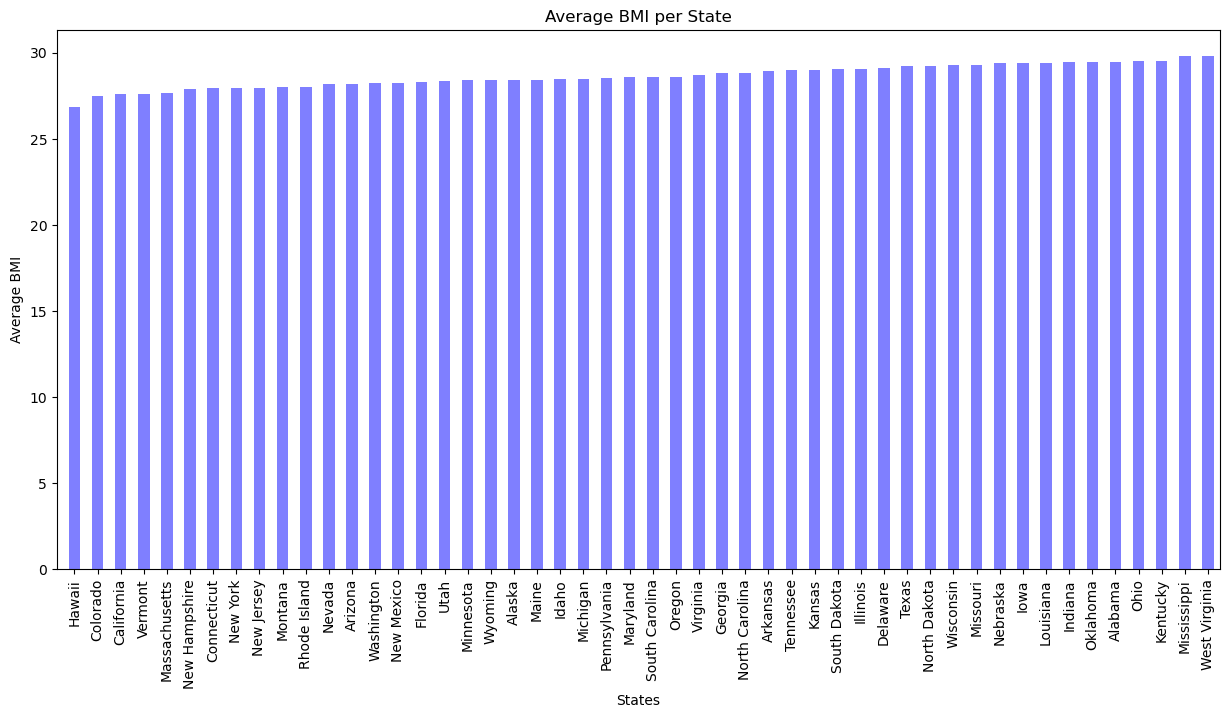

In [35]:
# Create a bar chart
categories=sorted_BMI['State']
values= sorted_BMI['BMI']
x=np.arange(len(categories))
plt.figure(figsize=(15,7))
plt.bar(x, values, align="center",width=.5, color='blue', alpha=0.5)

# Add titles and labels

plt.title('Average BMI per State')
plt.xlabel('States')
plt.ylabel('Average BMI')

#Format
plt.xticks(x, categories, rotation="vertical")
plt.xlim(-.75, len(categories) -0.5)

plt.savefig("output_data/BMI_by_State.png")

# Display the chart
plt.show()


In [39]:
Physical_df=cleaned_data3_df[['State', 'PhysicalActivities']]
Physical_df

,State,PhysicalActivities
0,Texas,Yes
1,Minnesota,Yes
2,Texas,Yes
4,Mississippi,Yes
5,California,Yes
...,...,...
111278,Massachusetts,Yes
111279,California,Yes
111280,Washington,Yes
111281,West Virginia,Yes


In [40]:
counts=Physical_df.groupby(['State', 'PhysicalActivities']).size().unstack(fill_value=0)

percentages=counts.div(counts.sum(axis=1), axis=0)*100

percentages.columns=['percentage_no', 'percentage_yes']
percentages.reset_index(inplace=True)
print(percentages)


             State  percentage_no  percentage_yes
0          Alabama      28.031038       71.968962
1           Alaska      20.756303       79.243697
2          Arizona      23.548387       76.451613
3         Arkansas      29.660239       70.339761
4       California      17.995546       82.004454
5         Colorado      15.220625       84.779375
6      Connecticut      21.570577       78.429423
7         Delaware      22.048193       77.951807
8          Florida      26.191317       73.808683
9          Georgia      26.842908       73.157092
10          Hawaii      19.444444       80.555556
11           Idaho      20.418470       79.581530
12        Illinois      22.805017       77.194983
13         Indiana      27.596439       72.403561
14            Iowa      25.296851       74.703149
15          Kansas      24.257633       75.742367
16        Kentucky      26.146789       73.853211
17       Louisiana      26.458505       73.541495
18           Maine      21.434708       78.565292


In [43]:
percentages_df=pd.DataFrame(percentages)
percentages_df

,State,percentage_no,percentage_yes
0,Alabama,28.031038,71.968962
1,Alaska,20.756303,79.243697
2,Arizona,23.548387,76.451613
3,Arkansas,29.660239,70.339761
4,California,17.995546,82.004454
5,Colorado,15.220625,84.779375
6,Connecticut,21.570577,78.429423
7,Delaware,22.048193,77.951807
8,Florida,26.191317,73.808683
9,Georgia,26.842908,73.157092


In [47]:
sorted2_df=percentages_df.sort_values(by='percentage_yes', ascending=False)
sorted2_df

,State,percentage_no,percentage_yes
5,Colorado,15.220625,84.779375
44,Vermont,16.389812,83.610188
36,Oregon,16.457680,83.542320
46,Washington,16.606628,83.393372
43,Utah,17.132216,82.867784
4,California,17.995546,82.004454
20,Massachusetts,18.081960,81.918040
22,Minnesota,18.475312,81.524688
10,Hawaii,19.444444,80.555556
29,New Jersey,19.790382,80.209618


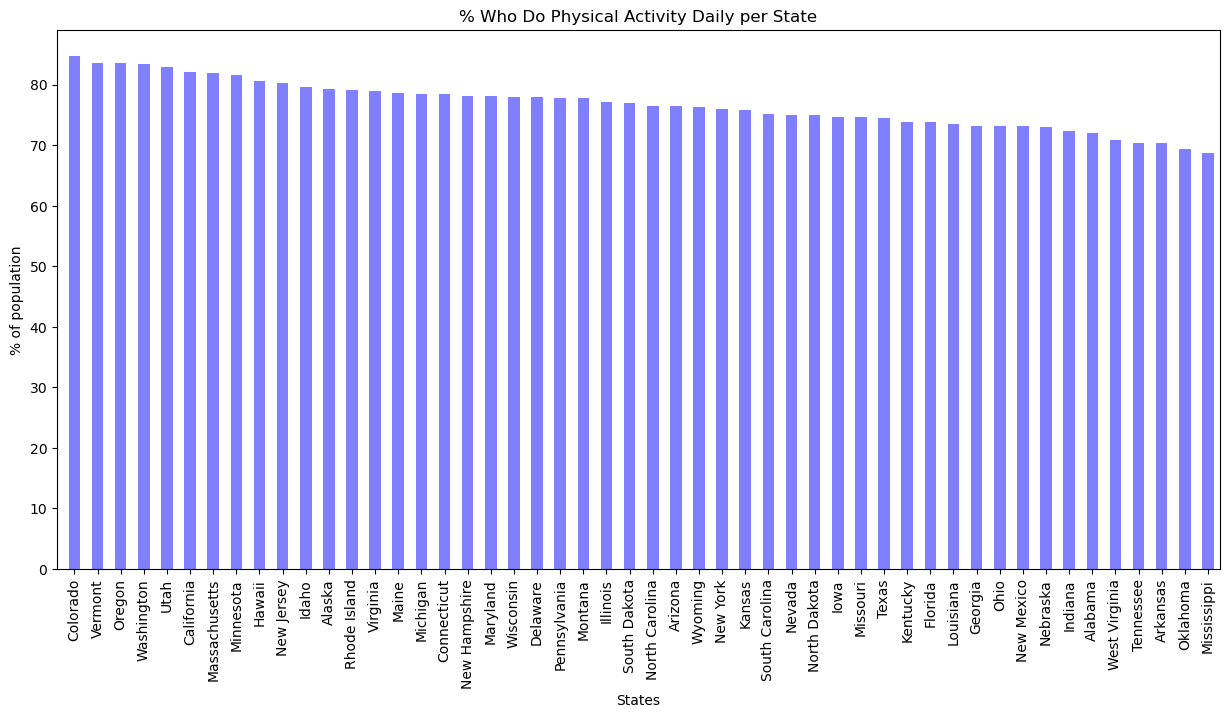

In [48]:
# Create a bar chart
categories=sorted2_df['State']
values= sorted2_df['percentage_yes']
x=np.arange(len(categories))
plt.figure(figsize=(15,7))
plt.bar(x, values, align="center",width=.5, color='blue', alpha=0.5)

# Add titles and labels

plt.title('% Who Do Physical Activity Daily per State')
plt.xlabel('States')
plt.ylabel('% of population')

#Format
plt.xticks(x, categories, rotation="vertical")
plt.xlim(-.75, len(categories) -0.5)

plt.savefig("output_data/%_physical_per_state.png")

# Display the chart
plt.show()